# Uppgift 1
I den här uppgiften ska du visualisera med hjälp av matplotlib

a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena (engelska, matematik, svenska,
svenska som andraspråk). Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "data/riket2023_åk9_np.xlsx"
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

df_list = []

# Reads and updates the columnname for each sheet then saves the dataframe to a list
for subject in subjects:
    df = pd.read_excel(file_path, sheet_name=subject, header=8)
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]
    df["Totalt (poäng)"] = df["Totalt (poäng)"].replace("..", "0").astype(float)
    df_list.append(df)

df_list[3].head()

b) För de olika ämnena, rita en stapeldiagram på totala poängen för de olika huvudmännen. Placera alla diagram i en
plott med subplottar

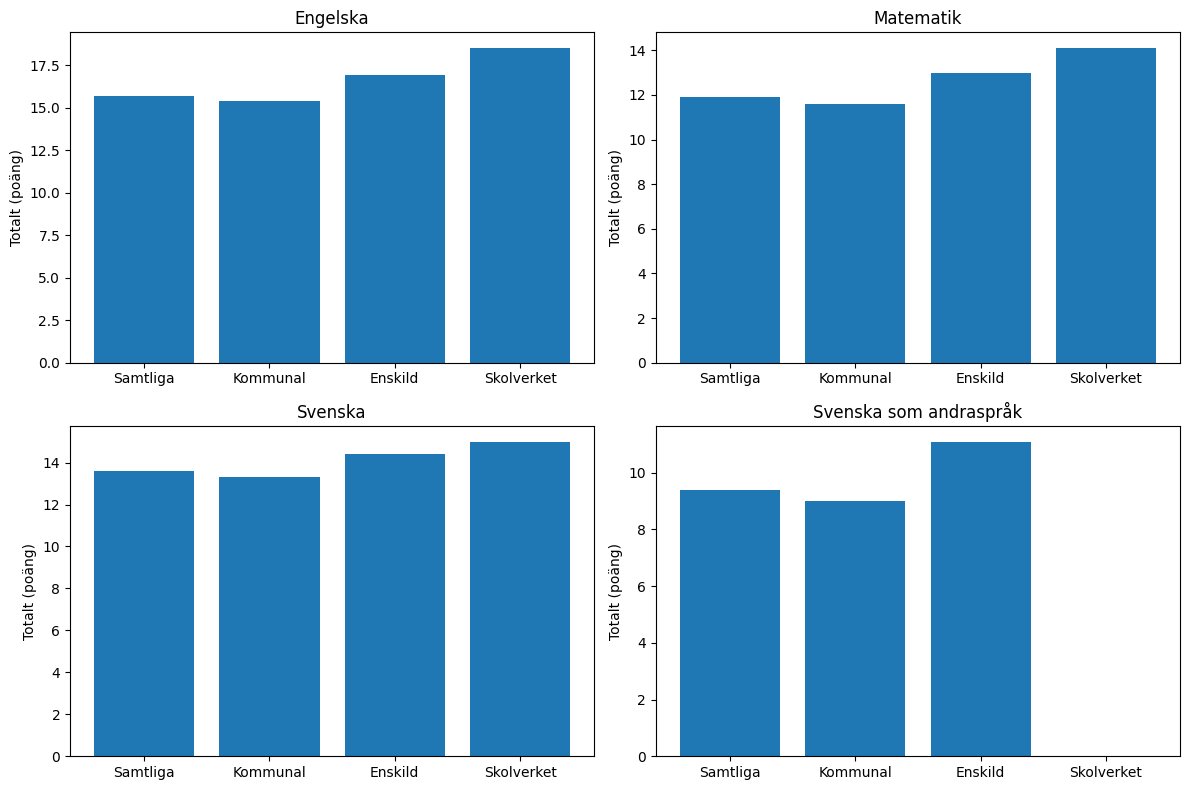

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each dataframe and plot 
for ax, df, subject in zip(axes.flatten(), df_list, subjects):
    # Filters dataframe to get the data from corresponding columns
    df_filtered = df[["Huvudman", "Totalt (poäng)"]]
    
    ax.bar(df_filtered["Huvudman"], df_filtered["Totalt (poäng)"]) # Set x-axis with data from "Huvudman" and y-axis with total points
    ax.set_title(subject)
    ax.set_ylabel("Totalt (poäng)")

plt.tight_layout()
plt.savefig("visualiseringar/ämnesresultat.png", facecolor="white", bbox_inches="tight")
plt.show()

# Uppgift 2
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.


In [ ]:
import plotly.express as px

file_path = "data/betyg_o_prov_riksnivå.xlsx"
df = pd.read_excel(file_path, sheet_name="Tabell 1B", skiprows=7)

df.info()

df.head()

a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.


In [ ]:
# Filters out column 0, 7, 8, 9 from dataframe which contain missing grade percentage
df_missing_grade = df.iloc[:, [0, 7, 8, 9]]
# Renames columns
df_missing_grade.columns = ["År", "Totalt", "Flickor", "Pojkar"]
# Filter out the first 5 rows which contain 2018 to 2023
df_missing_grade = df_missing_grade.iloc[0:5]

fig_missing_grade = px.line(
    df_missing_grade, 
    x= "År", 
    y=["Totalt", "Flickor", "Pojkar"],
    title= "Elever med underkänt i minst ett ämne",
    labels={"År": "Läsår", "value": "Andel %", "variable": "Kategori"})

fig_missing_grade.update_layout(hovermode="x")

fig_missing_grade.show()
fig_missing_grade.write_html("visualiseringar/andel_elever_med_underkänt_2018-2023")

b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.


In [ ]:
# Filters out the first 4 columns from dataframe which contain student merit
df_merit16 = df.iloc[:, 0:4]
# Renames columns
df_merit16.columns = ["År", "Totalt", "Flickor", "Pojkar"]
# Filter out the first 5 rows which contain 2018 to 2023
df_merit16 = df_merit16.iloc[0:5]

fig_merit16 = px.line(
    df_merit16,
    x= "År",
    y= ["Totalt", "Flickor", "Pojkar"],
    title="Genomsnittligt meritvärde per elev (16 ämnen), 2018 -2023",
    labels= {"År": "Läsår", "value": "Genomsnittligt meritvärde", "variable": "Kategori"}
)

fig_merit16.update_layout(hovermode="x")

fig_merit16.show()
fig_merit16.write_html("visualiseringar/genomsnittligt_meritvärde_per_elev")

c) (bonus) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data
finns för läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

In [121]:
# Filter out the first 4 columns from dataframe which contain student merit
df_parents_education_merit = df.iloc[:, 0:4]
# Rename columns
df_parents_education_merit.columns = ["Föräldrarnas högsta utbildning", "Totalt", "Flickor", "Pojkar"]
# Filter out row 22 to 25 which contains the parents highest education
df_parents_education_merit = df_parents_education_merit.iloc[22:25]

fig_parents_education_merit = px.line(
    df_parents_education_merit,
    x="Föräldrarnas högsta utbildning",
    y= ["Totalt", "Flickor", "Pojkar"],
    title= "Elevers genomsnittliga meritvärde efter föräldrarnas högsta utbildning",
    labels= {"value": "Genomsnittligt meritvärde", "variable": "Kategori"}
)

fig_parents_education_merit.show()
fig_parents_education_merit.write_html("visualiseringar/genomsnittligt_meritvärde_efter_föräldrarnas_utbildning")

In [149]:
# Filter out the first 4 columns from dataframe which contain student missing grade percentage
df_parents_edu_missing_grade = df.iloc[:, [0, 7, 8, 9]]
# Rename columns
df_parents_edu_missing_grade.columns = ["Föräldrarnas högsta utbildning", "Totalt", "Flickor", "Pojkar"]
# Filter out row 22 to 25 which contains the parents highest education
df_parents_edu_missing_grade = df_parents_edu_missing_grade.iloc[22:25]

fig_parents_edu_missing_grade = px.bar(
    df_parents_edu_missing_grade,
    x= "Föräldrarnas högsta utbildning",
    y= ["Totalt", "Flickor", "Pojkar"],
    title= "Elever med minst ett underkänt ämne efter föräldrarnas högsta utbildning",
    labels= {"value": "Andel %", "variable": "Kategori"},
    barmode="group"
)


fig_parents_edu_missing_grade.show()
fig_parents_edu_missing_grade.write_html("visualiseringar/andel_underkänt_efter_föräldrarnas_högsta_utbildning")